In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, get_scorer_names, balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, make_scorer
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [2]:
def avalia_indices(tn, fp, fn, tp):
    ac = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    sens = tp/(tp+fn)
    f1 = (2*precision*sens)/(precision+sens)
    esp = tn/(tn+fp)
    ef = (sens+esp)/2
    # auc = roc_auc_score(y_test,y_test_pred)
    # matt = matthews_corrcoef(y_test,y_test_pred)
    # cohen = cohen_kappa_score(y_test,y_test_pred)
    print(f'Acurácia: {ac*100:.2f}%')
    print(f'Precisão: {precision*100:.2f}%')
    print(f'Recall: {sens*100:.2f}%')
    print(f'F1-Score: {f1*100:.2f}%')
    print(f'Especificidade: {esp*100:.2f}%')
    print(f'Eficiência: {ef*100:.2f}%')
    # print(f'Área abaixo da curva ROC: {auc:.2f}')
    # print(f'Coeficiente de Matthews: {matt:.2f}')
    # print(f'Coeficiente de correlação de Kappa: {cohen:.2f}')

    scores = [ac, precision, sens, f1, esp, ef]
    labels = ['Acurácia', '  Precisão', 'Recall', 'F1\nScore','Especi-\nficidade', 'Eficiên\ncia']
    plt.bar(labels, scores, width=.2)
    plt.title('Avaliação dos índices de avaliação')
    plt.xlabel('Medidas de Avaliação')
    plt.grid(True, which='both', linestyle='--', linewidth=0.8, color='red')

In [3]:
d = {0:1,
     1:-1}
df = pd.read_csv('creditcard.csv')
df['Class'] = df['Class'].map(d)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,1
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,1
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,1


In [4]:
y = df['Class'].values
X= df.iloc[:, :30].values
X[:]
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [5]:
X_train_val, X_test, y_train_val, y_test = \
    train_test_split(X, y, test_size=0.5, shuffle = True, random_state=27, stratify = y)

X_train, X_val, y_train, y_val = \
    train_test_split(X_train_val, y_train_val, test_size=0.5, shuffle = True, random_state=27, stratify = y_train_val)
# print((np.bincount(y_train)))

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
scaler.fit(X_val)
X_val_std = scaler.transform(X_val)
scaler.fit(X_test)
X_test_std = scaler.transform(X_test)

print(np.shape(X_test))
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(y_test))
print(np.shape(y_train))
print(np.shape(y_val))

(142404, 30)
(71201, 30)
(71202, 30)
(142404,)
(71201,)
(71202,)


In [7]:
search_space = {
    'n_estimators': Integer((500), (2500)),
    'contamination': Real(0.01, 0.5),
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

In [8]:
model = IsolationForest(random_state=87)

In [9]:
clf = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=20,
    cv=10,
    n_jobs=-1,
    scoring='matthews_corrcoef'
)
clf.fit(X_val_std,y=y_val)

c:\Users\rhuan\AppData\Local\Programs\Python\Python311\Lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


BayesSearchCV(cv=10, estimator=IsolationForest(random_state=87), n_iter=20,
              n_jobs=-1, scoring='matthews_corrcoef',
              search_spaces={'bootstrap': [True, False],
                             'contamination': Real(low=0.01, high=0.5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=500, high=2500, prior='uniform', transform='normalize'),
                             'warm_start': [True, False]})

In [10]:
print(clf.best_score_)
print(clf.best_params_)

0.2314829552979092
OrderedDict([('bootstrap', False), ('contamination', 0.01), ('n_estimators', 2500), ('warm_start', True)])


In [11]:
params = dict(clf.best_params_)
bootstrap = params['bootstrap']
contamination = params['contamination']
n_estimators = params['n_estimators']
warm_start = params['warm_start']
print(params)

{'bootstrap': False, 'contamination': 0.01, 'n_estimators': 2500, 'warm_start': True}


In [12]:
train = IsolationForest(random_state=87, n_jobs=-1, bootstrap= params['bootstrap'], contamination= params['contamination'], n_estimators= params['n_estimators'], warm_start= params['warm_start'])
model = train.fit(X_train_std)

In [13]:
class MeuModelo:
    def __init__(self, bootstrap, contamination, n_estimators, warm_start):
        self.bootstrap = bootstrap
        self.contamination = contamination
        self.n_estimators = n_estimators
        self.warm_start = warm_start
        self.modelo = IsolationForest(random_state=87, n_jobs=-1, bootstrap= bootstrap, contamination= contamination, n_estimators= n_estimators, warm_start= warm_start)

    def treinar(self, X_train):
        self.modelo.fit(X_train)

    def avaliar(self, X_test, y_test):
        y_test_pred = self.modelo.predict(X_test)
        conf_matrix = confusion_matrix(y_test, y_test_pred)
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.9)
        for i in range(conf_matrix.shape[0]):
            for j in range(conf_matrix.shape[1]):
                ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
        plt.xlabel('Predictions', fontsize=10)
        plt.ylabel('Actuals', fontsize=10)
        plt.title('Confusion Matrix', fontsize=10)
        plt.show()
        tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
        ac = (tp+tn)/(tp+tn+fp+fn)
        precision = tp/(tp+fp)
        sens = tp/(tp+fn)
        f1 = (2*precision*sens)/(precision+sens)
        esp = tn/(tn+fp)
        ef = (sens+esp)/2
        return ac, precision, sens, f1, esp, ef

In [14]:
y_train_pred = model.predict(X_train_std)

In [15]:
y_val_pred = model.predict(X_val_std)

In [16]:
y_test_pred = model.predict(X_test_std)

In [17]:
print(f'Balance Acurracy tr: {balanced_accuracy_score(y_train, y_train_pred)}')

Balance Acurracy tr: 0.7800366801889691


In [18]:
print(f'Balance Acurracy val: {balanced_accuracy_score(y_val, y_val_pred)}')

Balance Acurracy val: 0.7839962679793936


In [19]:
print(f'Balance Acurracy test: {balanced_accuracy_score(y_test, y_test_pred)}')

Balance Acurracy test: 0.8124937590911383


In [20]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()
conf_matrix

array([[   70,    53],
       [  642, 70436]], dtype=int64)

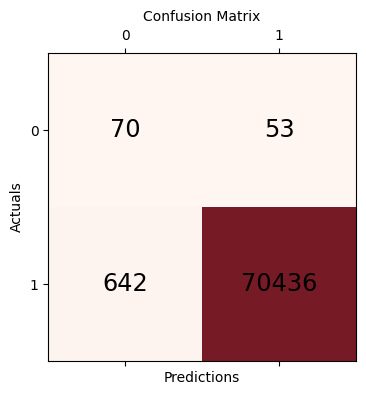

In [21]:
#here
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

Acurácia: 99.02%
Precisão: 99.92%
Recall: 99.10%
F1-Score: 99.51%
Especificidade: 56.91%
Eficiência: 78.00%


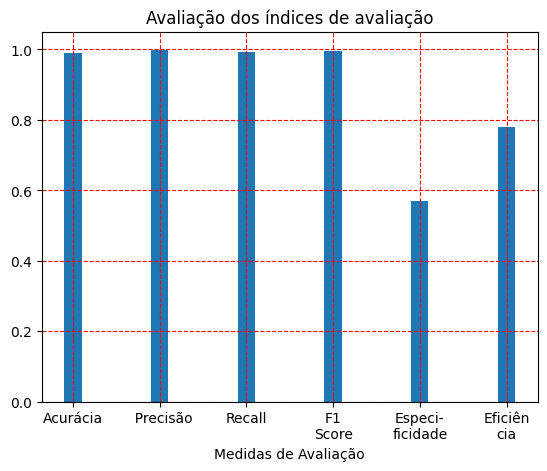

In [22]:
avalia_indices(tn, fp, fn, tp)

In [23]:
print(roc_auc_score(y_train,y_train_pred))
print(cohen_kappa_score(y_train,y_train_pred))
print(matthews_corrcoef(y_train,y_train_pred))

0.7800366801889691
0.16520531006584727
0.23375687884667307


In [24]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
conf_matrix

array([[   71,    52],
       [  657, 70422]], dtype=int64)

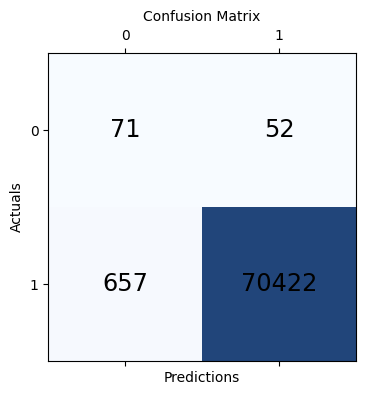

In [25]:
#here
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

Acurácia: 99.00%
Precisão: 99.93%
Recall: 99.08%
F1-Score: 99.50%
Especificidade: 57.72%
Eficiência: 78.40%


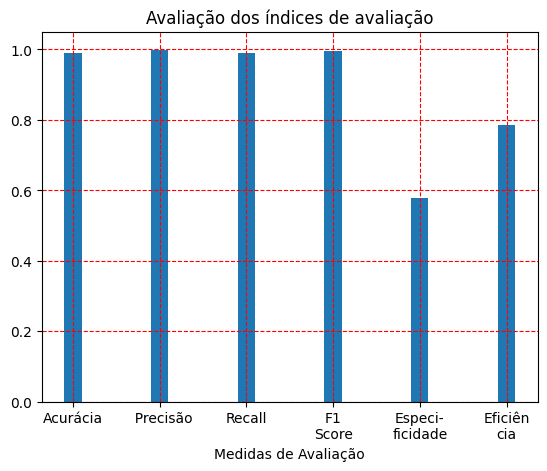

In [26]:
avalia_indices(tn, fp, fn, tp)

In [27]:
print(roc_auc_score(y_val,y_val_pred))
print(cohen_kappa_score(y_val,y_val_pred))
print(matthews_corrcoef(y_val,y_val_pred))

0.7839962679793935
0.1643927993024905
0.2344691387706012


In [28]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
conf_matrix

array([[   156,     90],
       [  1302, 140856]], dtype=int64)

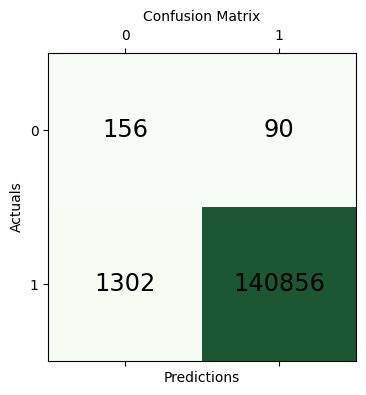

In [29]:
#here
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

Acurácia: 99.02%
Precisão: 99.94%
Recall: 99.08%
F1-Score: 99.51%
Especificidade: 63.41%
Eficiência: 81.25%


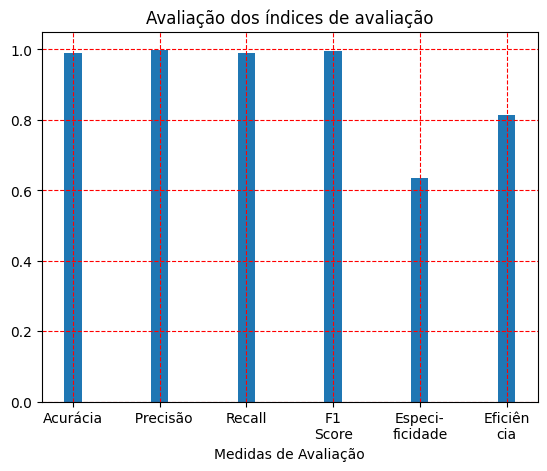

In [30]:
avalia_indices(tn, fp, fn, tp)

In [31]:
print(roc_auc_score(y_test,y_test_pred))
print(cohen_kappa_score(y_test,y_test_pred))
print(matthews_corrcoef(y_test,y_test_pred))

0.8124937590911384
0.1806765240241469
0.2578216659587881


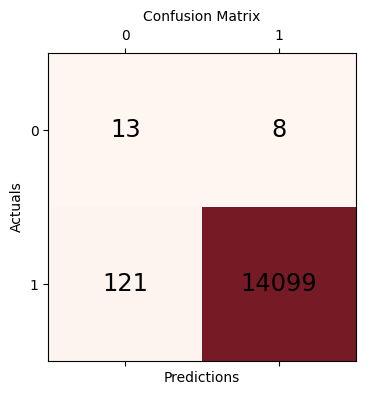

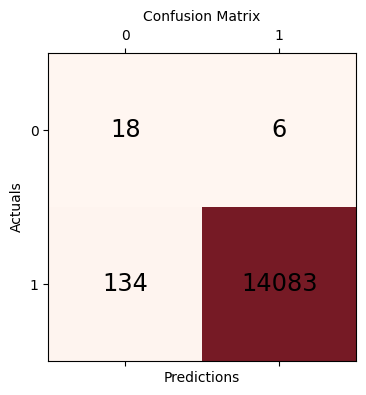

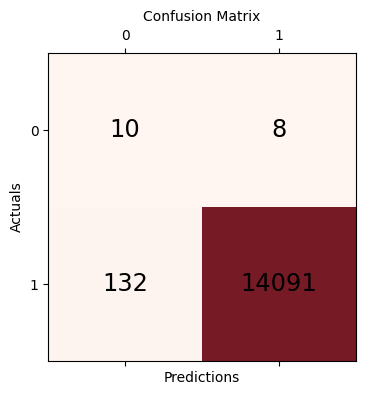

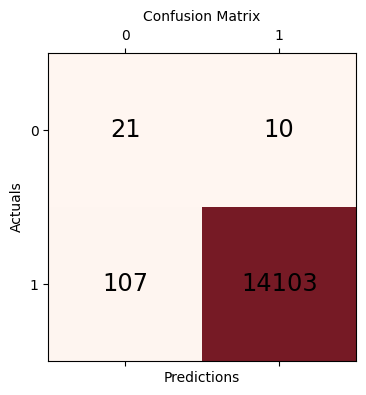

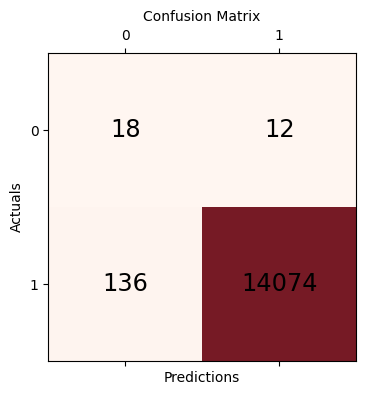

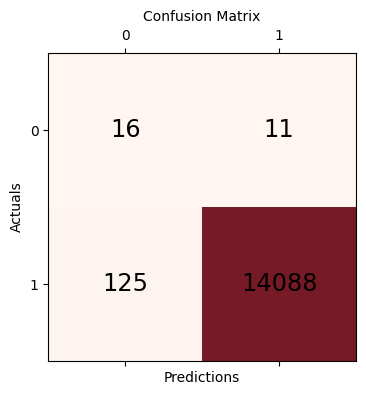

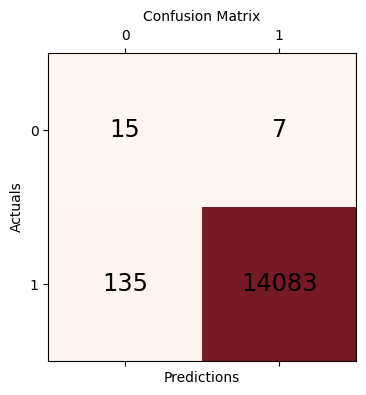

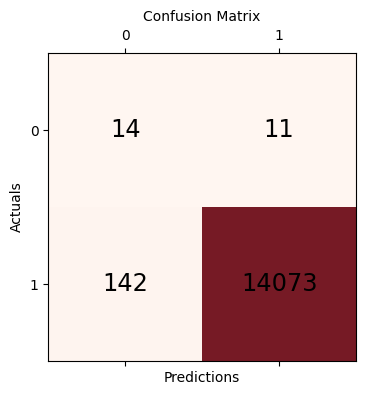

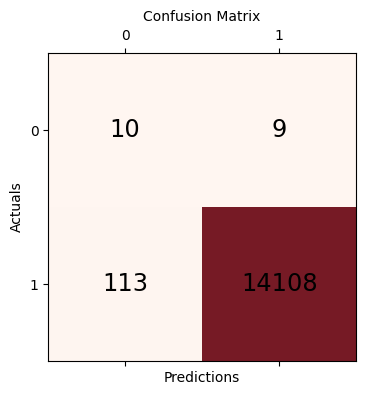

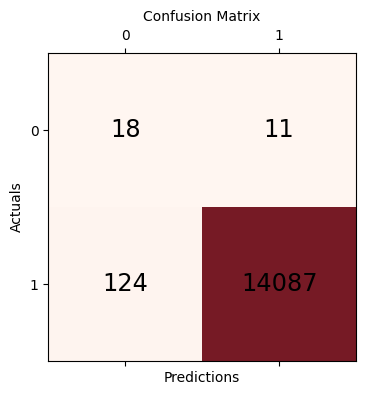

In [32]:
num_folds = 10

kf = KFold(n_splits=num_folds)

avaliacoes_ac = []
avaliacoes_precision = []
avaliacoes_sens = []
avaliacoes_f1 = []
avaliacoes_esp = []
avaliacoes_ef = []

X_kfold = X_test_std.copy()

for train_index, test_index in kf.split(X_kfold):
    X_tr, X_t = X_kfold[train_index], X_kfold[test_index]
    y_tr, y_t = y_test[train_index], y_test[test_index]

    modelo = MeuModelo(bootstrap=bootstrap,
                        n_estimators=n_estimators, 
                        contamination=contamination,
                        warm_start=warm_start)

    modelo.treinar(X_tr)

    ac, precision, sens, f1, esp, ef = modelo.avaliar(X_t, y_t)

    avaliacoes_ac.append(ac)
    avaliacoes_precision.append(precision)
    avaliacoes_sens.append(sens)
    avaliacoes_f1.append(f1)
    avaliacoes_esp.append(esp)
    avaliacoes_ef.append(ef)
    
media_ac = np.mean(avaliacoes_ac)
media_precision = np.mean(avaliacoes_precision)
media_sens = np.mean(avaliacoes_sens)
media_f1 = np.mean(avaliacoes_f1)
media_esp = np.mean(avaliacoes_esp)
media_ef = np.mean(avaliacoes_ef)

In [33]:
print(f'Acurácia: {media_ac*100:.2f}%')
print(f'Precisão: {media_precision*100:.2f}%')
print(f'Recall: {media_sens*100:.2f}%')
print(f'F1-Score: {media_f1*100:.2f}%')
print(f'Especificidade: {media_esp*100:.2f}%')
print(f'Eficiência: {media_ef*100:.2f}%')

Acurácia: 99.04%
Precisão: 99.93%
Recall: 99.11%
F1-Score: 99.52%
Especificidade: 61.83%
Eficiência: 80.47%


In [34]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_test,y_test_pred)

(array([0.99827252, 0.99936146, 1.        ]),
 array([1.        , 0.99084118, 0.        ]),
 array([-1,  1]))

In [35]:
tfp = fp/(tn+fp)
tfp

0.36585365853658536

In [36]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred)
from sklearn.metrics import auc
pr_auc = auc(recall, precision)

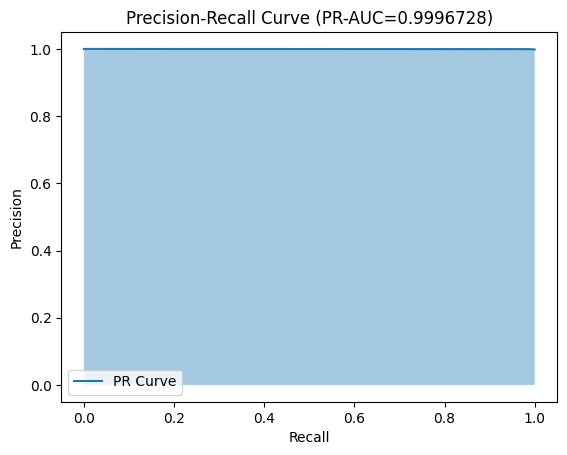

In [37]:
plt.plot(recall, precision, label='PR Curve')
plt.fill_between(recall, precision, alpha=0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PR-AUC={:.7f})'.format(pr_auc))
plt.legend()
plt.show()